In [2]:
import requests # 웹 페이지 소스를 얻기 위한 패키지(기본 내장 패키지이다.)
from bs4 import BeautifulSoup # 웹 페이지 소스를 얻기 위한 패키지, 더 간단히 얻을 수 있다는 장점이 있다고 한다.
from datetime import datetime                                # (!pip install beautifulsoup4 으로 다운받을 수 있다.)
import pandas as pd # 데이터를 처리하기 위한 가장 기본적인 패키지
import time # 사이트를 불러올 때, 작업 지연시간을 지정해주기 위한 패키지이다. (사이트가 늦게 켜지면 에러가 발생하기 때문)
import urllib.request #
from selenium.webdriver import Chrome
import json
import re     
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [3]:
comment_data = pd.read_csv('testword.csv')

In [10]:
aaa = list(comment_data['comment'])
aaa

['💥댓글 이벤트💥\r\n댓글을 달아주신 분들 중 추첨을 통해 한 분에게 고알레 7부팬츠를 선물로 드립니다!\r\n당첨자 발표는 6월12일 고정 댓글을 확인 해주세요ㅎㅎ\r\n \n감독님들이 입은 유니폼이 궁금하시다면!\r\n고알레 스마트스토어 https://bit.ly/39WB3xM',
 '1.공을 잘 밀어놓기\n2.디딤발의 위치\n3.임팩트 때 시선\n4.슈팅 후 몸이 앞으로 나가기\n\n역시 믿고보는 고알레! 고알레 항상 응원합니당 영상이 나올 수록 제 실력도 나아지네요 ㅎㅎ',
 '저도 슈팅중에 감아차기를 제일 좋아하고 잘 쓰는데 힘이 안쓸려서 고민이 많았는데 이 영상을 보고 힘쓰는법을 알게 됬어요 연습을 많이해서 고체티노님처럼 감아차기 하고싶습니다!!카카PD골 많이 넣을 수 있을것같네요!!ㅎㅎ',
 '고알레 하루도 빠짐없이 시청합니다.\n아마추어 축구인들의 길라잡이라할까요?\n고알레만의 고급정보 항상 감사합니다.\n고알레 시청하면서 즐거움과 내자신이 많은것을 바꾸어가면서 실력향상이 되는듯하네요~언제나 유익한 내용과\n실전영상 많이올리시길 바랍니다.\n고알레 화이팅!',
 '고체티노가 알려주니까 카카pd가\n잘차네..',
 '확실히 왼발은 고체티노가 잘찬다.',
 '저는 거의 슛팅을 감차로 차서 항상 고체티노님 영상 보면서 슛팅을 연습하는데 오늘도 슛팅 연습에 유용한 영상 감사합니다',
 'ㅎ 역시 감차는 고체티노네요 \n감차의 교과서 같습니다 ㅎ\n항상 재밌는 영상 올려주셔서 감사합니다~',
 '체중이동을 앞으로!!영상을 통해 저도 많이 배웠습니다 ㅎㅎ오늘도 좋은영상 감사합니다',
 '고체티노 생각하면서 차바야겠다 원래 잘차시는거아니조?',
 '이걸 봐도 변하지 않는 나.....',
 '고알레영상항상\n재밌어서꾸준히보게되네요\n배울점과느낄점도\n좋은영상많이부탁드립니다!',
 '1등 처음해본다 오.......',
 '카카님의 저번영상보고나서 발전을 기원했는데 역시나 고체님의 1대1 레슨으로 인해 슛팅 궤적이 후덜덜하네요!! 발전성이 더욱더 보여지네요~ 

In [8]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [12]:
comment_list = []
for i in range(len(aaa)):
    comment_list.append(comment_data['comment'].iloc[i])
comment_list

['💥댓글 이벤트💥\r\n댓글을 달아주신 분들 중 추첨을 통해 한 분에게 고알레 7부팬츠를 선물로 드립니다!\r\n당첨자 발표는 6월12일 고정 댓글을 확인 해주세요ㅎㅎ\r\n \n감독님들이 입은 유니폼이 궁금하시다면!\r\n고알레 스마트스토어 https://bit.ly/39WB3xM',
 '1.공을 잘 밀어놓기\n2.디딤발의 위치\n3.임팩트 때 시선\n4.슈팅 후 몸이 앞으로 나가기\n\n역시 믿고보는 고알레! 고알레 항상 응원합니당 영상이 나올 수록 제 실력도 나아지네요 ㅎㅎ',
 '저도 슈팅중에 감아차기를 제일 좋아하고 잘 쓰는데 힘이 안쓸려서 고민이 많았는데 이 영상을 보고 힘쓰는법을 알게 됬어요 연습을 많이해서 고체티노님처럼 감아차기 하고싶습니다!!카카PD골 많이 넣을 수 있을것같네요!!ㅎㅎ',
 '고알레 하루도 빠짐없이 시청합니다.\n아마추어 축구인들의 길라잡이라할까요?\n고알레만의 고급정보 항상 감사합니다.\n고알레 시청하면서 즐거움과 내자신이 많은것을 바꾸어가면서 실력향상이 되는듯하네요~언제나 유익한 내용과\n실전영상 많이올리시길 바랍니다.\n고알레 화이팅!',
 '고체티노가 알려주니까 카카pd가\n잘차네..',
 '확실히 왼발은 고체티노가 잘찬다.',
 '저는 거의 슛팅을 감차로 차서 항상 고체티노님 영상 보면서 슛팅을 연습하는데 오늘도 슛팅 연습에 유용한 영상 감사합니다',
 'ㅎ 역시 감차는 고체티노네요 \n감차의 교과서 같습니다 ㅎ\n항상 재밌는 영상 올려주셔서 감사합니다~',
 '체중이동을 앞으로!!영상을 통해 저도 많이 배웠습니다 ㅎㅎ오늘도 좋은영상 감사합니다',
 '고체티노 생각하면서 차바야겠다 원래 잘차시는거아니조?',
 '이걸 봐도 변하지 않는 나.....',
 '고알레영상항상\n재밌어서꾸준히보게되네요\n배울점과느낄점도\n좋은영상많이부탁드립니다!',
 '1등 처음해본다 오.......',
 '카카님의 저번영상보고나서 발전을 기원했는데 역시나 고체님의 1대1 레슨으로 인해 슛팅 궤적이 후덜덜하네요!! 발전성이 더욱더 보여지네요~ 

In [13]:
comment_result = []

for i in comment_list:
    tokens = re.sub(emoji_pattern,"",i)
    tokens = re.sub(han,"",tokens)
    comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [14]:

comment_result

,comment
0,댓글 이벤트댓글을 달아주신 분들 중 추첨을 통해 한 분에게 고알레 7부팬츠를 선물로...
1,1공을 잘 밀어놓기2디딤발의 위치3임팩트 때 시선4슈팅 후 몸이 앞으로 나가기역시 ...
2,저도 슈팅중에 감아차기를 제일 좋아하고 잘 쓰는데 힘이 안쓸려서 고민이 많았는데 이...
3,고알레 하루도 빠짐없이 시청합니다아마추어 축구인들의 길라잡이라할까요고알레만의 고급정...
4,고체티노가 알려주니까 카카pd가잘차네
...,...
29836,계란형 콜라보 잼나요평균 남성이면 보통 몇 정도가 맞을까요음30키로 여아 업고 스쿼...
29837,나도 빡빡이아저씨야
29838,쌕시한 레깅스입은 사람이 계속 코어에 힘주라는데 코어가먼가요
29839,언젠가부터 으뜸님 계란형 공혁준 세 사람이 함께 나오지 않으면 어색함 이게 누구 채...


# 형태소 분석기를 통한 명사 추출

In [15]:

#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용

In [16]:
from konlpy.tag import Twitter

def get_noun(comment_txt):
    twitter = Twitter()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

C:\Users\acorn\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [18]:

comment_result

,comment,token
0,댓글 이벤트댓글을 달아주신 분들 중 추첨을 통해 한 분에게 고알레 7부팬츠를 선물로...,"[댓글, 이벤트, 댓글, 중, 추첨, 통해, 분, 알레, 부, 팬츠, 선물, 당첨,..."
1,1공을 잘 밀어놓기2디딤발의 위치3임팩트 때 시선4슈팅 후 몸이 앞으로 나가기역시 ...,"[공, 발의, 위치, 임팩트, 때, 시선, 슈팅, 후, 몸, 앞, 역시, 알레, 알..."
2,저도 슈팅중에 감아차기를 제일 좋아하고 잘 쓰는데 힘이 안쓸려서 고민이 많았는데 이...,"[저, 슈팅, 차기, 제일, 힘, 고민, 이, 영상, 보고, 법, 알, 연습, 해,..."
3,고알레 하루도 빠짐없이 시청합니다아마추어 축구인들의 길라잡이라할까요고알레만의 고급정...,"[알레, 하루, 시청, 아마추어, 축구인, 길라잡이, 알레, 고급, 정보, 항상, ..."
4,고체티노가 알려주니까 카카pd가잘차네,"[고체, 티노, 카카]"
...,...,...
29836,계란형 콜라보 잼나요평균 남성이면 보통 몇 정도가 맞을까요음30키로 여아 업고 스쿼...,"[계란, 콜라보, 평균, 남성, 이면, 보통, 몇, 정도, 음, 여, 스쿼트, 개정..."
29837,나도 빡빡이아저씨야,"[빡빡이, 아저씨]"
29838,쌕시한 레깅스입은 사람이 계속 코어에 힘주라는데 코어가먼가요,"[쌕, 시한, 레깅스, 사람, 계속, 코어, 코어]"
29839,언젠가부터 으뜸님 계란형 공혁준 세 사람이 함께 나오지 않으면 어색함 이게 누구 채...,"[부터, 으뜸, 계란, 공혁준, 세, 사람, 이, 누구, 채널, 기도, 코어, 사실..."


# wordcloud 란?
- 자연어처리(NLP)시에 doc에서 언급된 단어들의 빈도수를 파악해서 빈도수가 높은 단어일 수록 크게 빈도수가 낮은 단어일 수록 작게 표현하는 시각화 기법.



In [19]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

In [20]:
noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])

In [21]:
counts = Counter(noun_list)
tags = counts.most_common(30)

In [27]:
tags = counts.most_common(150)

In [28]:
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

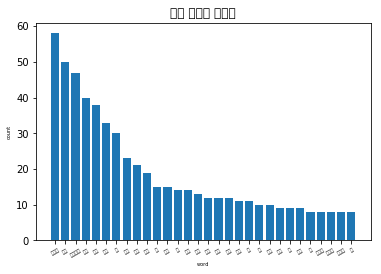

In [19]:
index = np.arange(len(test))
plt.bar(index,test['count'].tolist() )
plt.xlabel('word', fontsize=5)
plt.ylabel('count', fontsize=5)
plt.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt.title('단어 빈도수 시각화')
plt.show()

{'진짜': 2839, '영상': 2671, '운동': 2290, '형': 1789, '선수': 1374, '때': 1220, '거': 1197, '이': 1046, '축구': 1023, '저': 1015, '더': 1005, '보고': 893, '오늘': 858, '말': 858, '사람': 720, '것': 720, '왜': 710, '정말': 679, '항상': 672, '생각': 614, '개': 611, '좀': 594, '수': 571, '형님': 548, '계란': 533, '나': 523, '알레': 517, '역시': 510, '제': 507, '화이팅': 471, '몸': 434, '그': 433, '호': 423, '요': 422, '하나': 421, '뭐': 412, '이형': 386, '안': 383, '지금': 382, '내': 381, '분': 380, '전': 373, '팀': 367, '그냥': 366, '흑자': 353, '으뜸': 349, '쌤': 348, '이제': 334, '감독': 333, '시작': 332, '최고': 331, '경기': 330, '위': 321, '댓글': 319, '한번': 313, '컨텐츠': 308, '코로나': 307, '월': 306, '이번': 301, '요즘': 300, '계속': 297, '응원': 295, '사랑': 294, '정도': 293, '또': 291, '줄': 288, '웃기': 284, '마지막': 283, '처음': 280, '살': 278, '앞': 276, '다시': 274, '선생님': 273, '걸': 271, '다음': 271, '번': 268, '꼭': 266, '근육': 259, '힘': 257, '구독': 257, '볼': 255, '임': 254, '러브': 254, '때문': 252, '느낌': 248, '슛포': 244, '혁준': 243, '스트레칭': 240, '썸네일': 239, '해': 238, '알': 237, '후': 236, '모습': 23

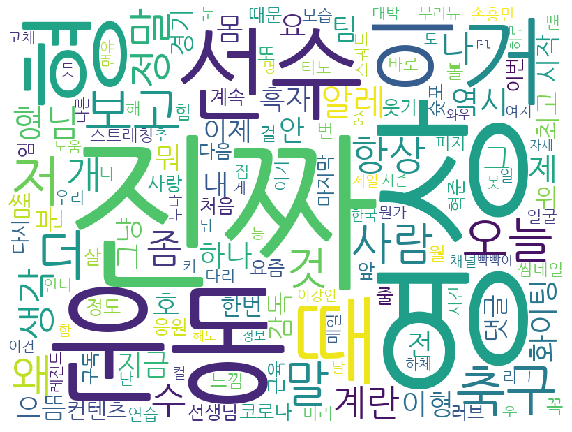

In [26]:
wc = WordCloud(font_path='NanumGothic.ttf',background_color='white', width=800, height=600)

print(dict(tags))
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()